In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import sys
sys.path.append('../src/')
import mnist
from binary_rbm_tensorflow import *

First load the data and make it binary

In [2]:
X_train, n_row, n_col = mnist.load_images('../data/train-images.idx3-ubyte')
y_train = mnist.load_labels('../data/train-labels.idx1-ubyte')
X_test, _, _ = mnist.load_images('../data/t10k-images.idx3-ubyte')
y_test = mnist.load_labels('../data/t10k-labels.idx1-ubyte')

X_train = np.around(X_train/np.amax(X_train))
X_test = np.around(X_test/np.amax(X_test))

Filter the data so that only images of twos remain

In [3]:
where = y_train == 2
y_train_2 = y_train[where]
X_train_2 = X_train[where,:]
where = y_test == 2
y_test_2 = y_test[where]
X_test_2 = X_test[where,:]

Look at some example images

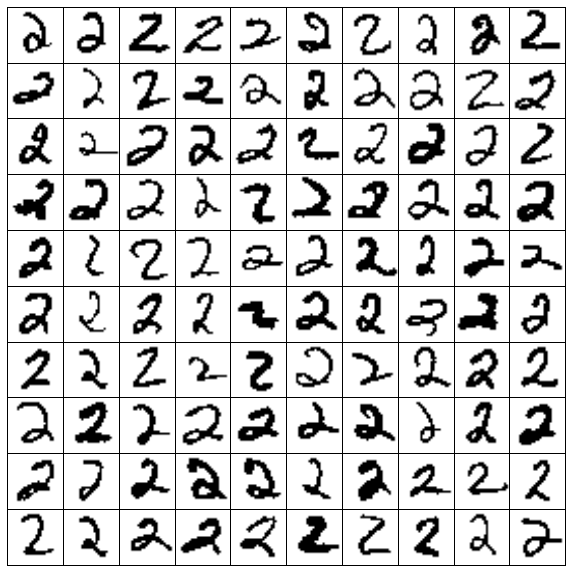

In [4]:
fig1 = mnist.plot_multiple_images(X_train_2[np.random.randint(0,X_train_2.shape[0],100),:])

Train an RBM on this using k-PCD

In [7]:
rbm = RestrictedBoltzmannMachine(n_row*n_col,100)
sess = tf.Session()
init_weights_and_biases = tf.variables_initializer([rbm.weights,\
                                                    rbm.bias_v,\
                                                    rbm.bias_h])
sess.run(init_weights_and_biases)
rbm.fit(sess,X_train_2,0.01,k=5,n_iter=20,batch_size=10,verbose=True)

iteration	0	squared_reconstruction_error	0.179631	
iteration	1	squared_reconstruction_error	0.141770	
iteration	2	squared_reconstruction_error	0.124141	
iteration	3	squared_reconstruction_error	0.115112	
iteration	4	squared_reconstruction_error	0.108970	
iteration	5	squared_reconstruction_error	0.103444	
iteration	6	squared_reconstruction_error	0.099384	
iteration	7	squared_reconstruction_error	0.096006	
iteration	8	squared_reconstruction_error	0.093414	
iteration	9	squared_reconstruction_error	0.090933	
iteration	10	squared_reconstruction_error	0.088740	
iteration	11	squared_reconstruction_error	0.087301	
iteration	12	squared_reconstruction_error	0.085239	
iteration	13	squared_reconstruction_error	0.083709	
iteration	14	squared_reconstruction_error	0.082529	
iteration	15	squared_reconstruction_error	0.081313	
iteration	16	squared_reconstruction_error	0.080307	
iteration	17	squared_reconstruction_error	0.079018	
iteration	18	squared_reconstruction_error	0.077944	
iteration	19	squared_r

Visualize the weights

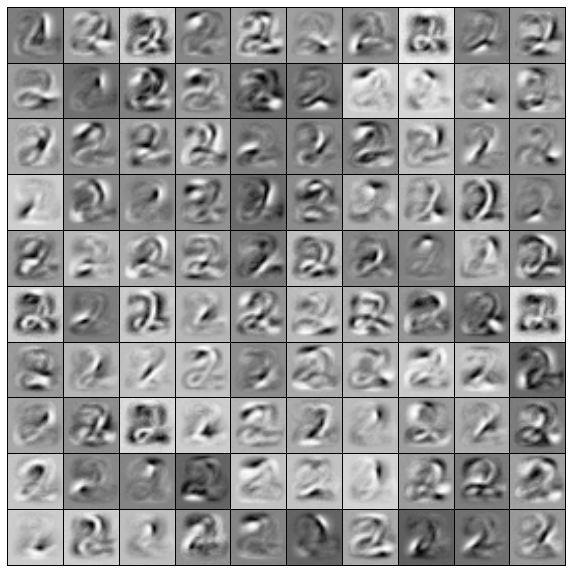

In [8]:
fig3 = mnist.plot_multiple_images(sess.run(rbm.weights))
plt.show()

Visualize the biases for the visible units

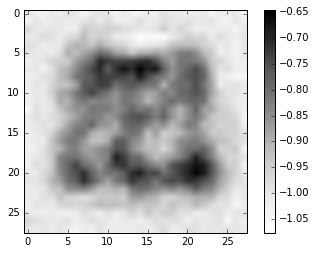

In [9]:
plt.imshow(np.reshape(sess.run(rbm.bias_v),(28,28)),cmap='Greys')
plt.colorbar()

Visualize the biases for the hidden units

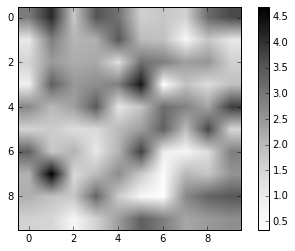

In [10]:
plt.imshow(np.reshape(sess.run(rbm.bias_h),(10,10)),cmap='Greys')
plt.colorbar()

Lets look at the reconstructions of some test set images

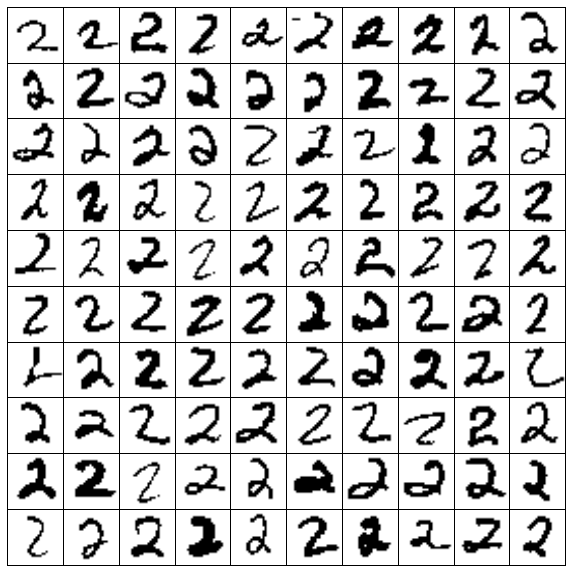

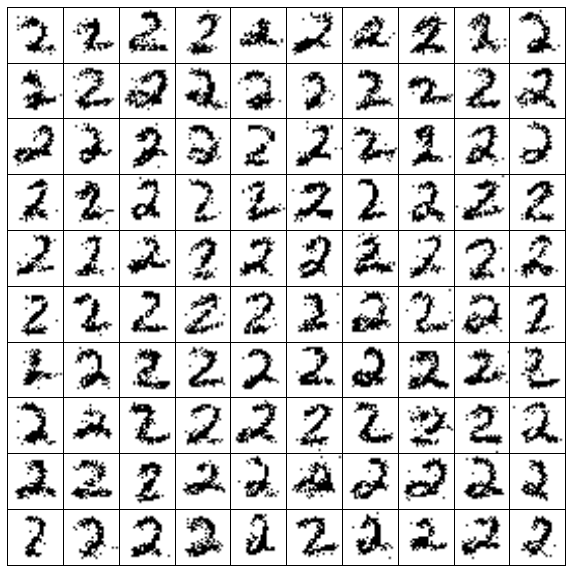

In [11]:
# create a subset of the data and a tensor representing this subset
X_sub = X_test_2[np.random.randint(0,X_test_2.shape[0],100)]
X_sub_tensor = tf.constant(X_sub,dtype=tf.float32)
# create a graph for the reconstruction which is given by a single Gibbs step
gibbs_step = rbm.gibbs_step(X_sub_tensor)
_, _, _, X_rec = sess.run(gibbs_step)
# plot the subset and its reconstruction
f1 = mnist.plot_multiple_images(X_sub)
f2 = mnist.plot_multiple_images(X_rec)

Generate pictures of twos from an arbitrary input vector. Start by generating an arbitrary vector.

(1, 784)


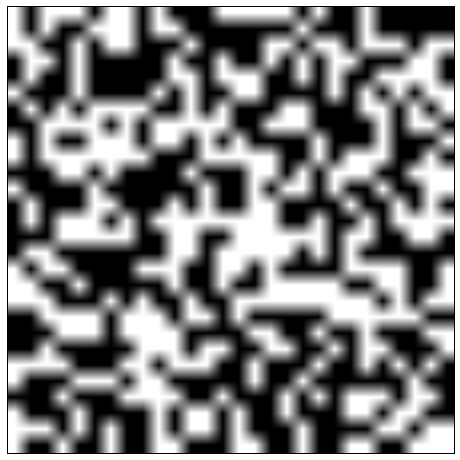

In [17]:
# first create random vector as a numpy array and plot it
v_rand = np.random.randint(0,2,n_row*n_col)
v_rand = np.reshape(v_rand,(1,n_row*n_col))
print v_rand.shape
fig4 = mnist.plot_image(v_rand,0)

Now feed this vector to the RBM and perform markov sampling on it. The result looks like a handwritten two.

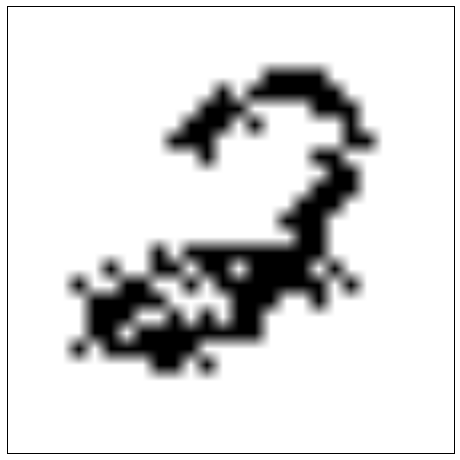

In [18]:
# Use a tf.Variable to represent the reconstructed vector. 
# The advantage of this is that in between reconstruction 
# steps the tf.Variable can be updated
rec = tf.Variable(v_rand,dtype=tf.float32) # the reconstruction from v_rand
init_rec = tf.variables_initializer([rec])
# update_rec is the graph for the reconstruction of rec
update_rec =  tf.assign(rec,rbm.gibbs_step(rec)[3])
sess.run(init_rec)
for i in xrange(0,100):
    sess.run(update_rec)
fig5 = mnist.plot_image(sess.run(rec),0)

Lets generate another handwritten two

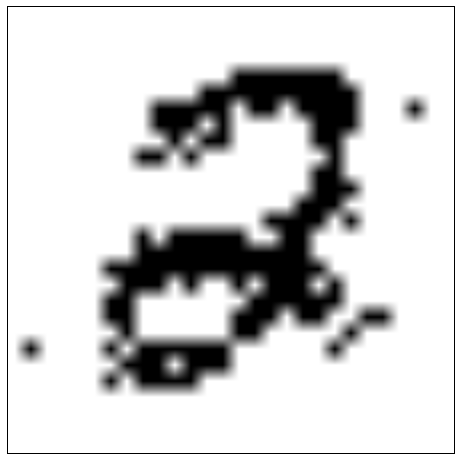

In [19]:
for i in xrange(0,100):
    sess.run(update_rec)
fig5 = mnist.plot_image(sess.run(rec),0)